*ÁRBOL DE DECISIÓN PARA ATRIBUTOS NUMÉRICOS* Ailén de Barbará y Tomás Schiavonne - 4 TIC A

*IMPORTAR TODO LO NECESARIO*

In [1]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.ensemble import BaggingClassifier

od.download("https://www.kaggle.com/c/titanic/data")
data = pd.read_csv('titanic/train.csv')
print(data.head())

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ailndebarbar
Your Kaggle Key: ··········


100%|██████████| 34.1k/34.1k [00:00<00:00, 38.3MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


In [2]:
#Mostrar los datos como tabla
print(tabulate(data.head(), headers='keys', tablefmt='psql'))

+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |
|----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------|
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |
|  1 |             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female |    38 |       1 |       0 | PC 17599         | 71.2833 | C85     | C          |
|  2 |             3 |          1 |        3 | Hei

In [3]:
# Cambiar la variable Sex a binario
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


*MODELO ÁRBOL DE DECISIÓN*

In [4]:
titanic = sns.load_dataset('titanic')

# Seleccionar solo las columnas numéricas
titanic_numeric = titanic.select_dtypes(include=['float64', 'int64'])
titanic_numeric['sex'] = titanic['sex']
titanic_numeric = titanic_numeric.dropna()

# Elegimos Sex como la variable a predecir
X = titanic_numeric.drop(columns=['sex'])
y = titanic_numeric['sex']
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Crear el modelo
dt_model = DecisionTreeClassifier(random_state=seed)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

*EVALUAR EL MODELO*

In [5]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7412587412587412


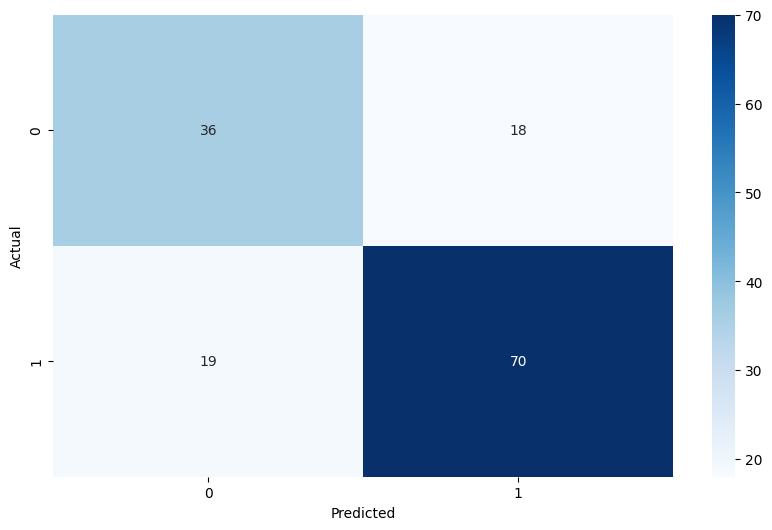

              precision    recall  f1-score   support

      female       0.65      0.67      0.66        54
        male       0.80      0.79      0.79        89

    accuracy                           0.74       143
   macro avg       0.72      0.73      0.73       143
weighted avg       0.74      0.74      0.74       143



In [6]:
# Confussion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))

*EVALUACIÓN DE PERFORMANCE CON ROC AUC*

In [7]:
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

In [8]:
y_test_binary = np.where(y_test == 'male', 1, 0)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)

In [9]:
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.7226383687057845


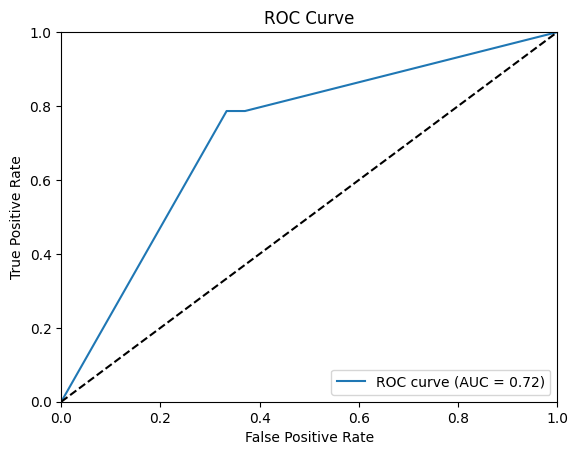

In [10]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

*MOSTRAR "FEATURE IMPORTANCE"*

In [11]:
X = titanic.select_dtypes(include=['int64', 'float64'])
feature_names = X.columns

# Obtener la importancia de los atributos
importancia_atributos = dt_model.feature_importances_

# Crear un DataFrame para mostrar la importancia de los atributos
importancia_df = pd.DataFrame({'Atributo': feature_names, 'Importancia': importancia_atributos})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)
print(importancia_df)

   Atributo  Importancia
0  survived     0.325768
2       age     0.289715
5      fare     0.276677
4     parch     0.048196
3     sibsp     0.035224
1    pclass     0.024419


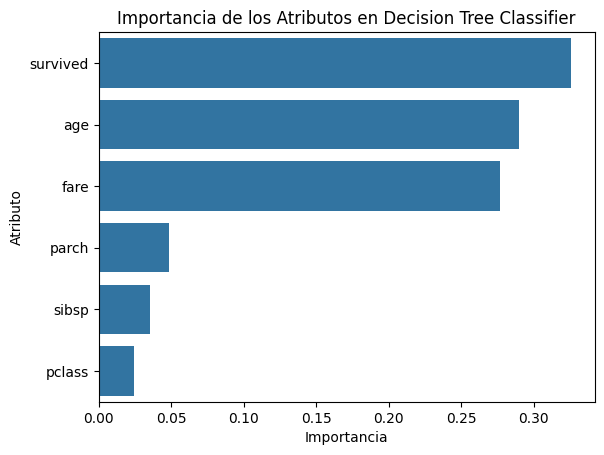

In [12]:
sns.barplot(x='Importancia', y='Atributo', data=importancia_df)
plt.title('Importancia de los Atributos en Decision Tree Classifier')
plt.show()

*BONUS*

In [13]:
decision_tree = DecisionTreeClassifier()

bagging_clf = BaggingClassifier(
    estimator=decision_tree,
    n_estimators=50,
    random_state=42
)

In [15]:
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión con Bagging: {accuracy:.2f}')

Precisión con Bagging: 0.76
